## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

#Libraries

In [ ]:
#Menghubungkan Google Drive ke Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd #Operasi DataFrame
import numpy as np #Operasi Matematika

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning dan Deep Learning
import sklearn
import tensorflow as tf

#Reading the Data

In [ ]:
#Membaca data training
train = pd.read_csv('train HR Data.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
#Membaca data testing
test = pd.read_csv('test HR Data.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

##Examining the Data

In [ ]:
#Pengecekan terhadap ukuran dari data train dan test

print("Ukuran dari Data Training :", train.shape)
print("Ukuran dari Data Testing  :", test.shape)

Ukuran dari Data Training : (54808, 14)
Ukuran dari Data Testing  : (23490, 13)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
((train.isnull().sum()/train.shape[0])*100).round(2)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [ ]:
print('Total Data Kosong Training :',train.isnull().sum().sum())
print('Atau dalam persen sebanyak : {:.2f}%'.format(((train.isnull().sum().sum()/train.shape[0])*100)))

Total Data Kosong Training : 6533
Atau dalam persen sebanyak : 11.92%


In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
((test.isnull().sum()/test.shape[0])*100).round(2)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [ ]:
print('Total Data Kosong Testing  :',test.isnull().sum().sum())
print('Atau dalam persen sebanyak : {:.2f}%'.format(((test.isnull().sum().sum()/test.shape[0])*100)))

Total Data Kosong Testing  : 2846
Atau dalam persen sebanyak : 12.12%


In [ ]:
missing_data = pd.DataFrame({'Missing Train':train.isnull().sum(),
                             'Train Percent (%)':((train.isnull().sum()/train.shape[0])*100).round(2),
                             'Missing Test':test.isnull().sum(),
                             'Test Percent (%)':((test.isnull().sum()/test.shape[0])*100).round(2)})

missing_data

,Missing Train,Train Percent (%),Missing Test,Test Percent (%)
KPIs_met >80%,0,0.00,0.0,0.00
age,0,0.00,0.0,0.00
avg_training_score,0,0.00,0.0,0.00
awards_won?,0,0.00,0.0,0.00
department,0,0.00,0.0,0.00
education,2409,4.40,1034.0,4.40
employee_id,0,0.00,0.0,0.00
gender,0,0.00,0.0,0.00
is_promoted,0,0.00,NaN,NaN
length_of_service,0,0.00,0.0,0.00


##Descriptive Statistics

In [ ]:
#Melihat deskriptif statistik pada kolom numerik
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
#Melihat deskriptif statistik pada kolom kategorikal
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


##Target Class Balance

0    50140
1     4668
Name: is_promoted, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


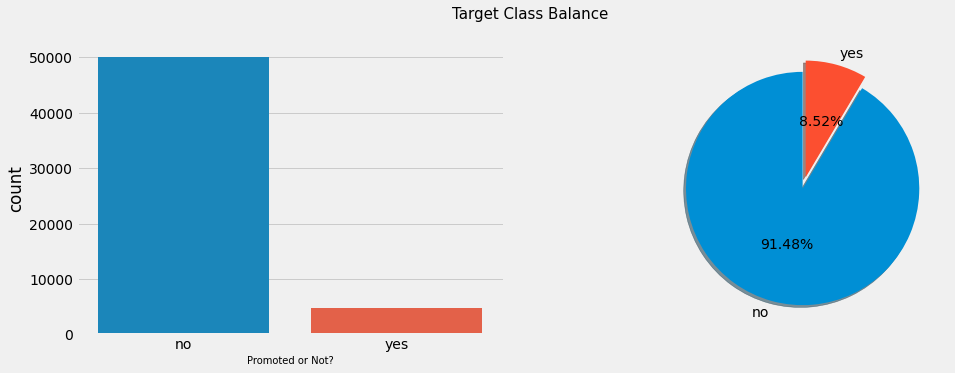

In [ ]:
# lets check the Target Class Balance

print(train['is_promoted'].value_counts())

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)
plt.xticks([0,1],['no','yes'])
plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['no','yes'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

#Cleaning Missing Values


* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [ ]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Total dari Data kosong pada Training sekarang :", train.isnull().sum().sum())

Total dari Data kosong pada Training sekarang : 0


In [ ]:
# lets impute the missing values in the Training Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Total dari Data kosong pada Testing sekarang :", test.isnull().sum().sum())

Total dari Data kosong pada Testing sekarang : 0


#Data Analysis/Visualizations

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

In [ ]:
def plot_box(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.boxplot(x=x, data=df)
  plt.title('Persebaran dari kolom {}'.format(x), fontsize=20)
  plt.show()

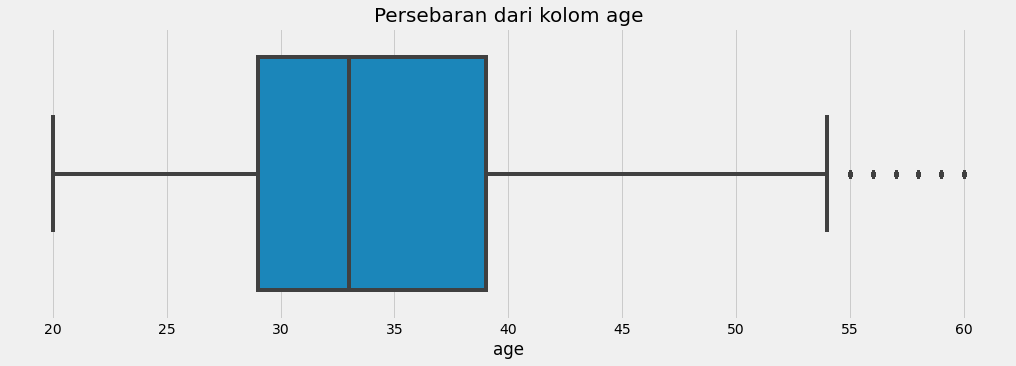

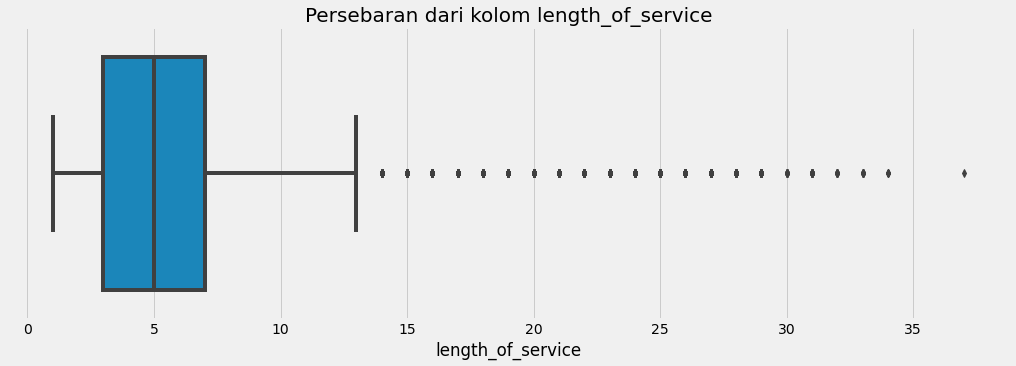

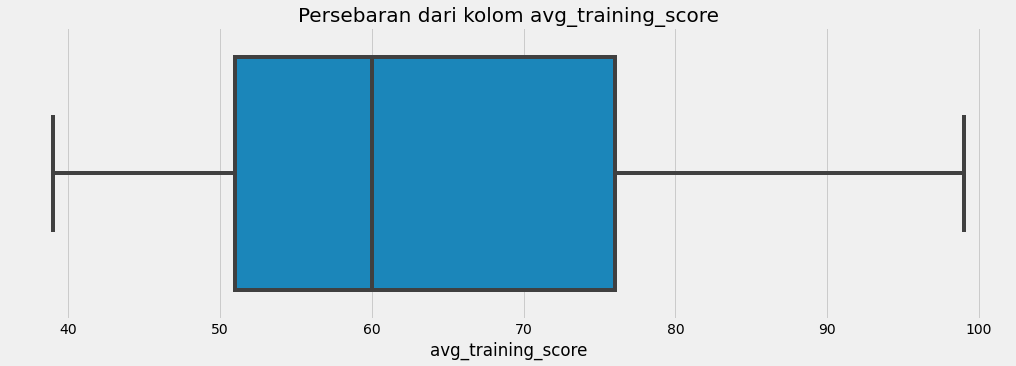

In [ ]:
numerical_columns = ['age','length_of_service','avg_training_score']
for col in numerical_columns:
  plot_box(str(col), train)

In [ ]:
def plot_dist(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.distplot(df[x])
  plt.title('Persebaran dari kolom {}'.format(x), fontsize=20)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


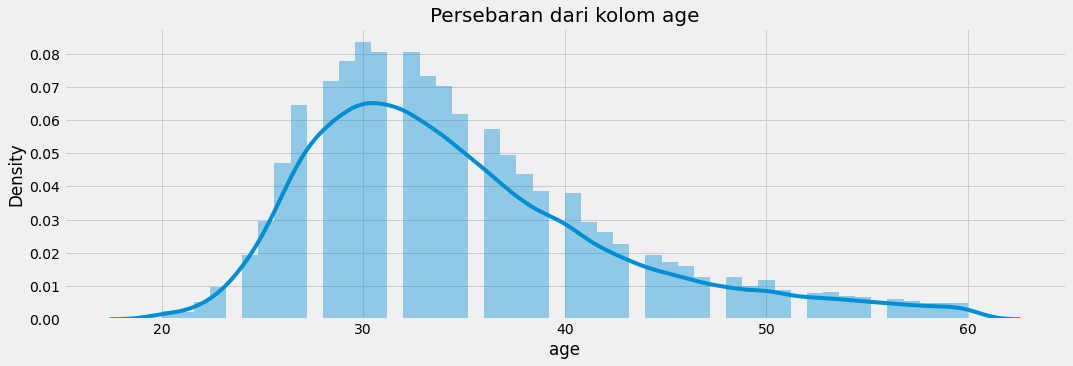

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


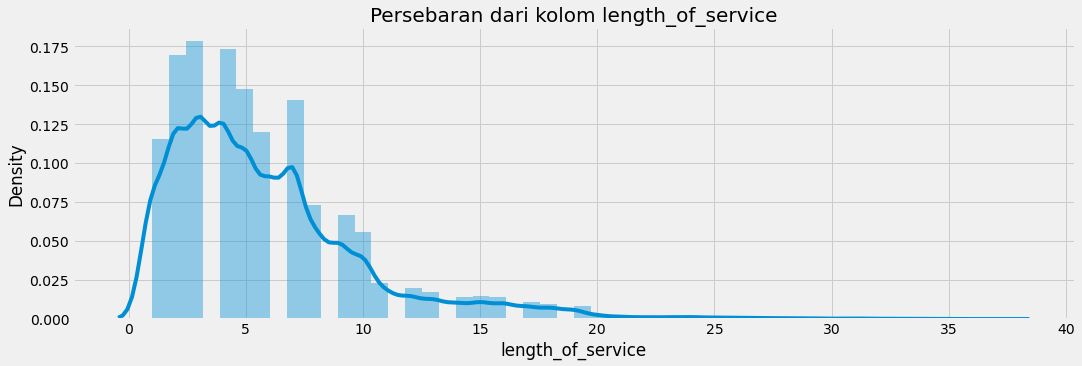

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


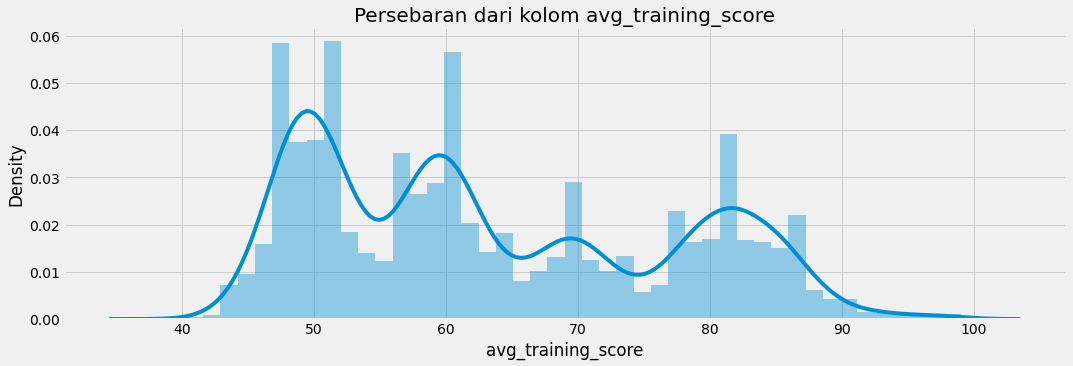

In [ ]:
for col in numerical_columns:
  plot_dist(str(col), train)

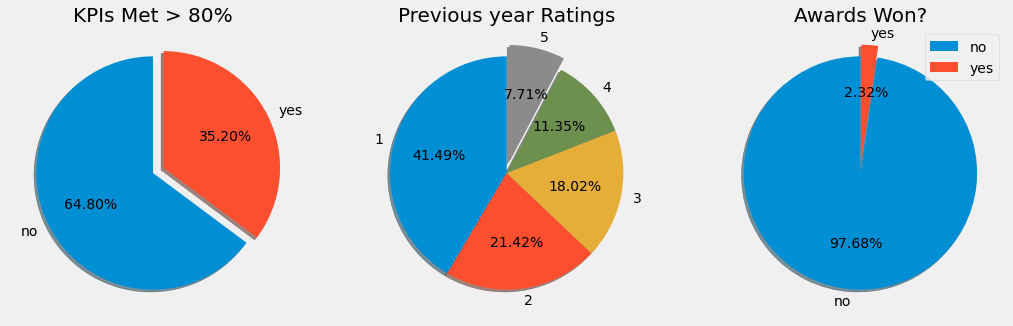

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
plt.pie(train['KPIs_met >80%'].value_counts(), labels = ['no','yes'],
        explode = [0, 0.1], shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
plt.pie(train['previous_year_rating'].value_counts(),
        labels = ['1','2','3','4','5'], explode = [0, 0, 0, 0, 0.1],
        shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
plt.pie(train['awards_won?'].value_counts(), labels = ['no','yes'],
        explode = [0, 0.1], shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

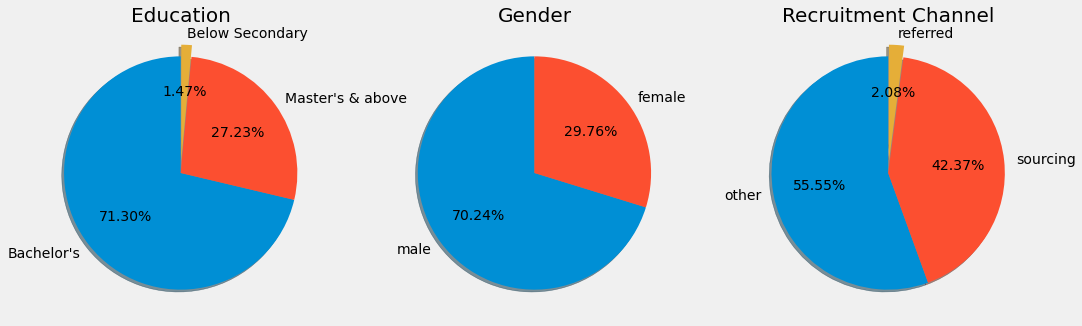

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
plt.pie(train['education'].value_counts(), labels = train['education'].value_counts().index,
        explode = [0, 0, 0.1], shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
plt.pie(train['gender'].value_counts(), labels = ['male','female'],
        explode = [0, 0], shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
plt.pie(train['recruitment_channel'].value_counts(), labels = train['recruitment_channel'].value_counts().index,
        explode = [0,0,0.1], shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

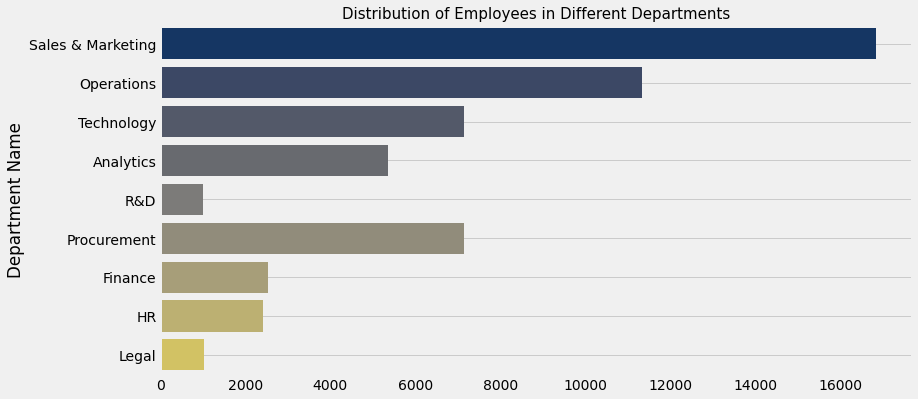

In [ ]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

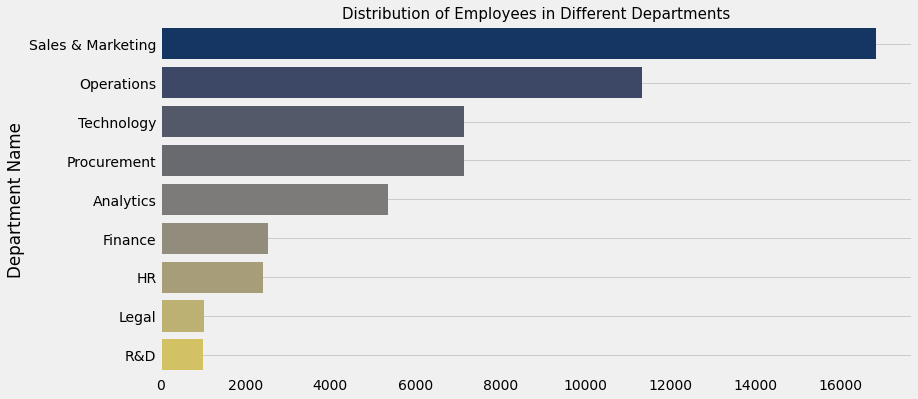

In [ ]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis',
              order = train['department'].value_counts().index)
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

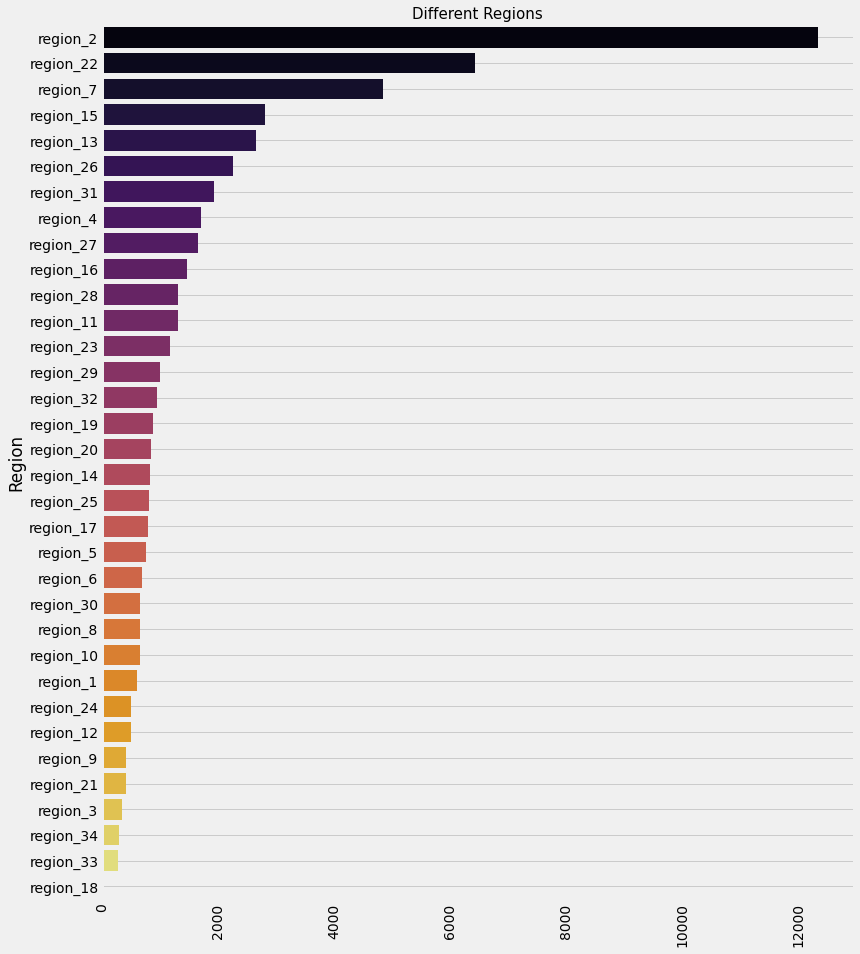

In [ ]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno',
              order = train['region'].value_counts().index)
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

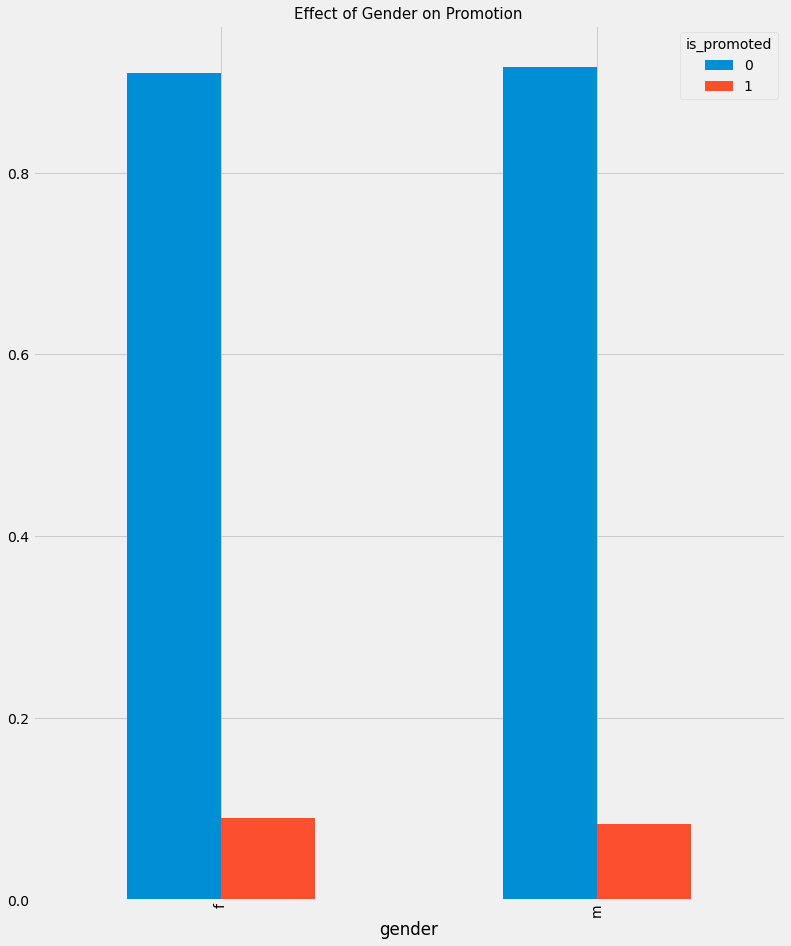

In [ ]:
# Lets compare the Gender Gap in the promotion

x = pd.crosstab(train['gender'], train['is_promoted'])

x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.show()

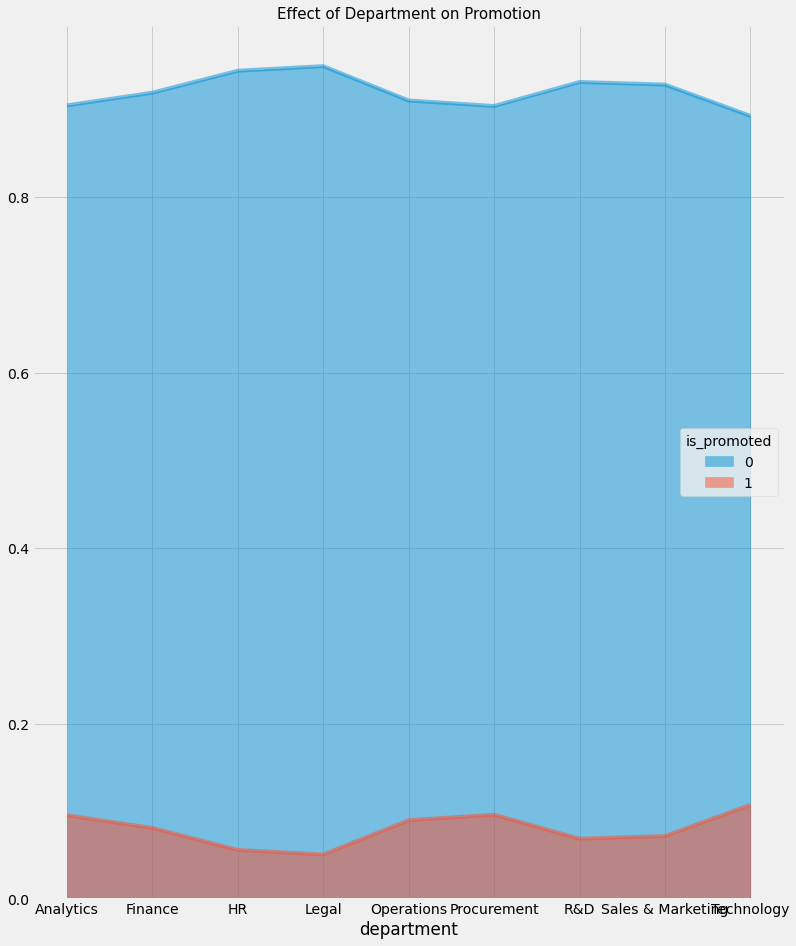

In [ ]:
# Lets compare the Gender Gap in the promotion

x = pd.crosstab(train['department'], train['is_promoted'])

x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.show()

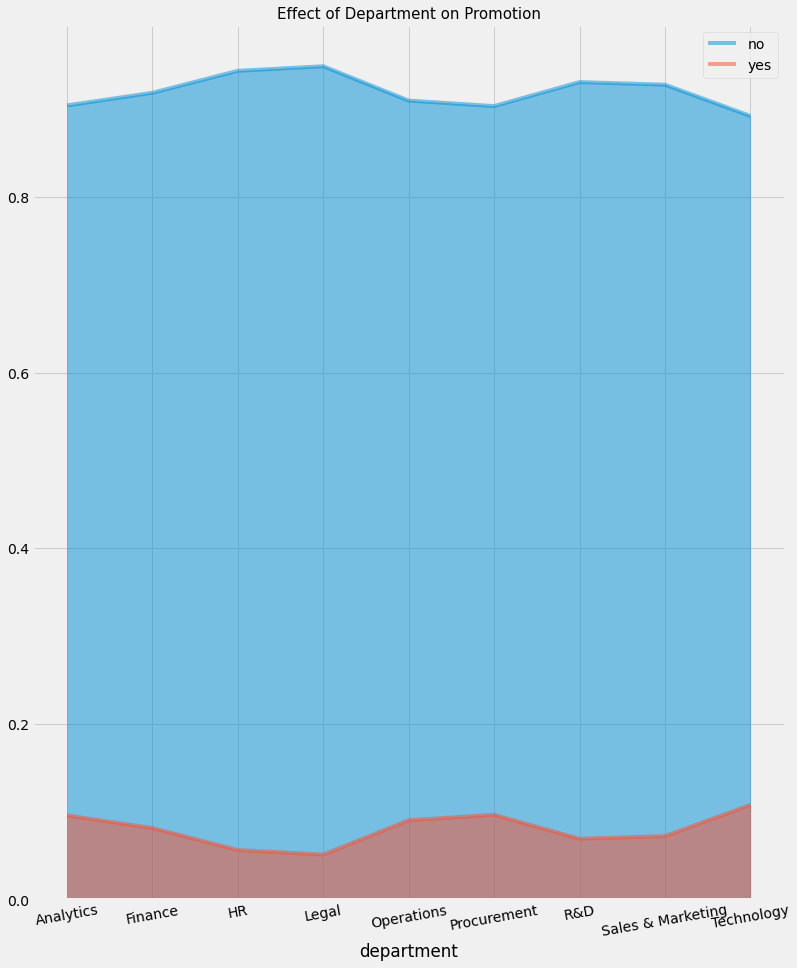

In [ ]:
x = pd.crosstab(train['department'], train['is_promoted'])

x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation=10)
plt.legend(['no','yes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


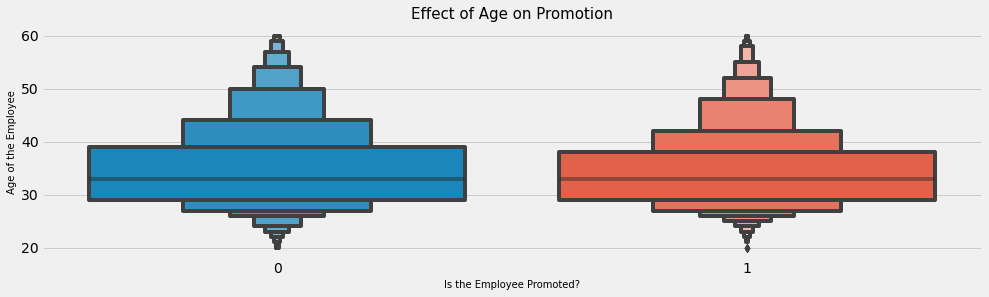

In [ ]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'])
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.xticks()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


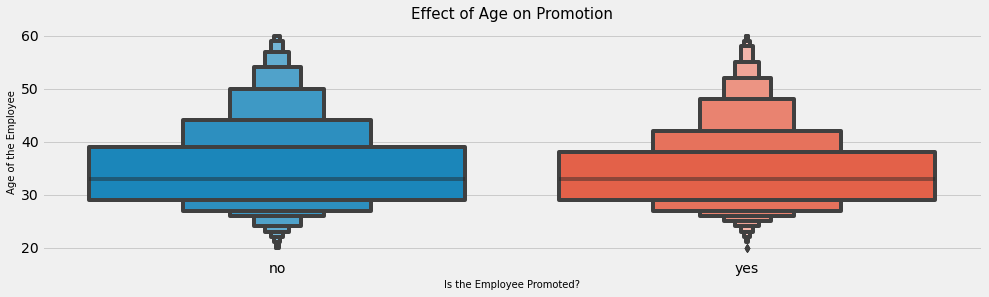

In [ ]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'])
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.xticks([0,1],['no','yes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


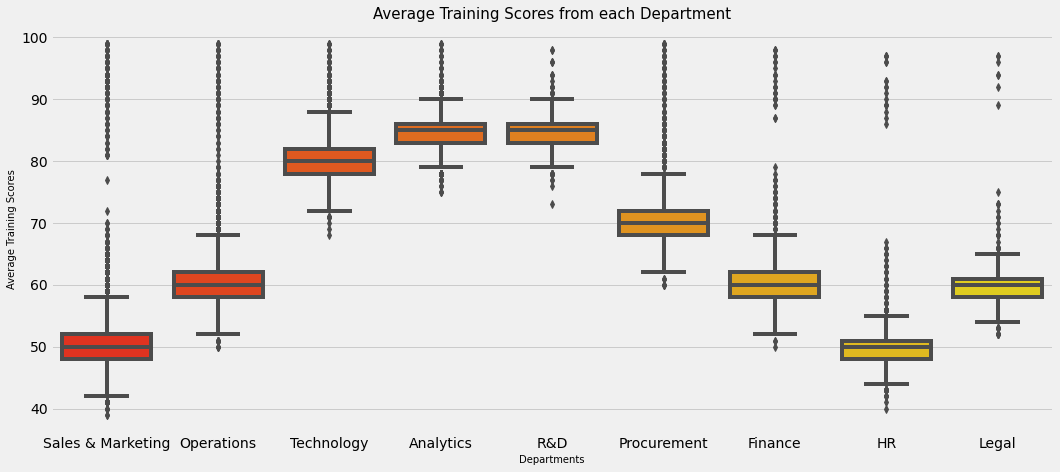

In [ ]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'],
            palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Average Training Scores', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

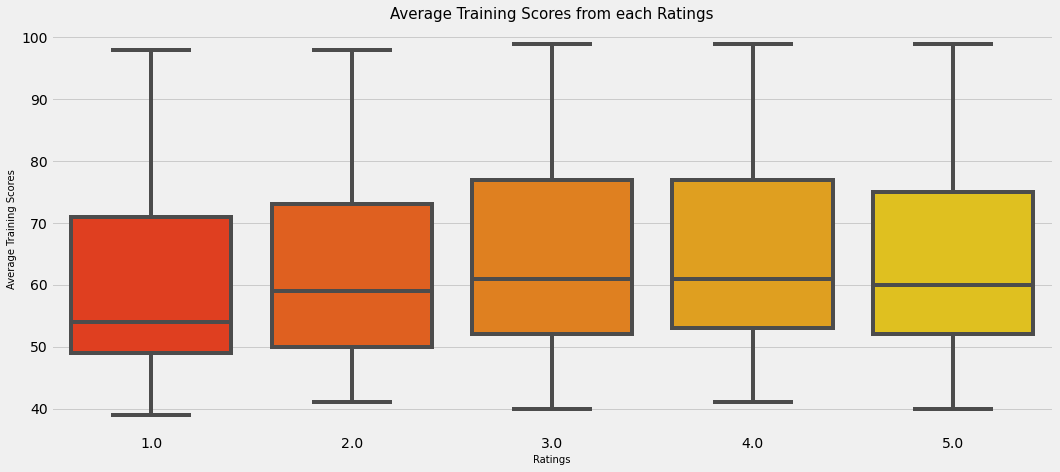

In [ ]:
#previous year rating -> avg_training_score
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'previous_year_rating', y = 'avg_training_score',
            data = train,
            palette = 'autumn')
plt.title('Average Training Scores from each Ratings', fontsize = 15)
plt.ylabel('Average Training Scores', fontsize = 10)
plt.xlabel('Ratings', fontsize = 10)
plt.show()

In [ ]:
numerical_columns

['age', 'length_of_service', 'avg_training_score']

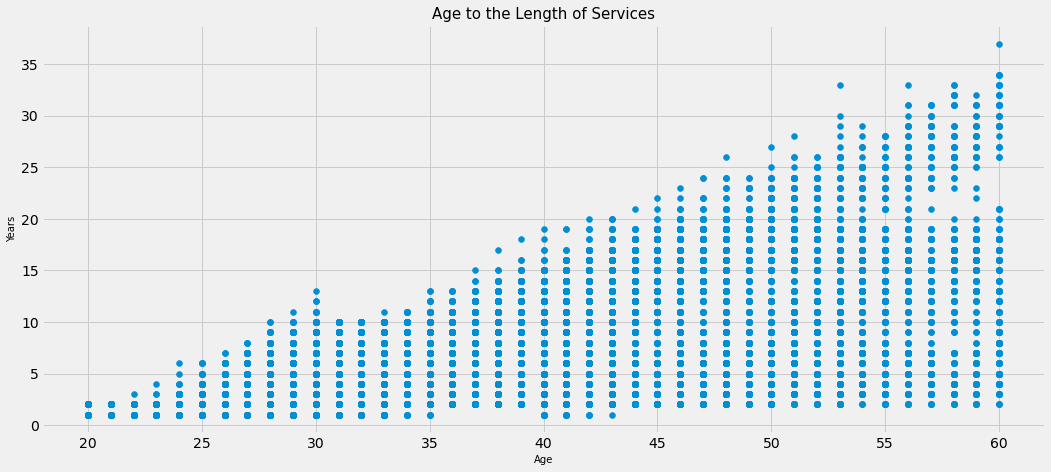

In [ ]:
#age to the length of service

plt.rcParams['figure.figsize'] = (16, 7)
plt.scatter(train['age'], train['length_of_service'])
plt.title('Age to the Length of Services', fontsize = 15)
plt.ylabel('Years', fontsize = 10)
plt.xlabel('Age', fontsize = 10)
plt.show()

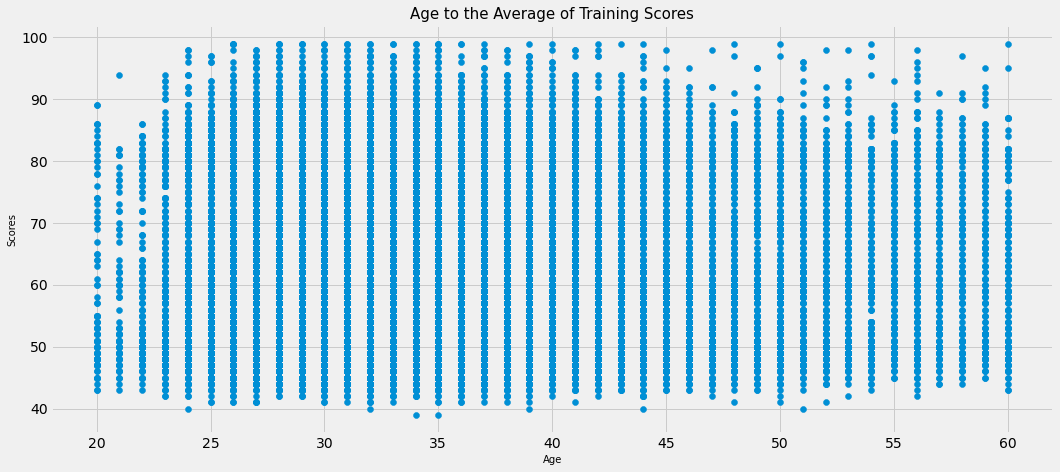

In [ ]:
#age to the avg training score

plt.rcParams['figure.figsize'] = (16, 7)
plt.scatter(train['age'], train['avg_training_score'])
plt.title('Age to the Average of Training Scores', fontsize = 15)
plt.ylabel('Scores', fontsize = 10)
plt.xlabel('Age', fontsize = 10)
plt.show()

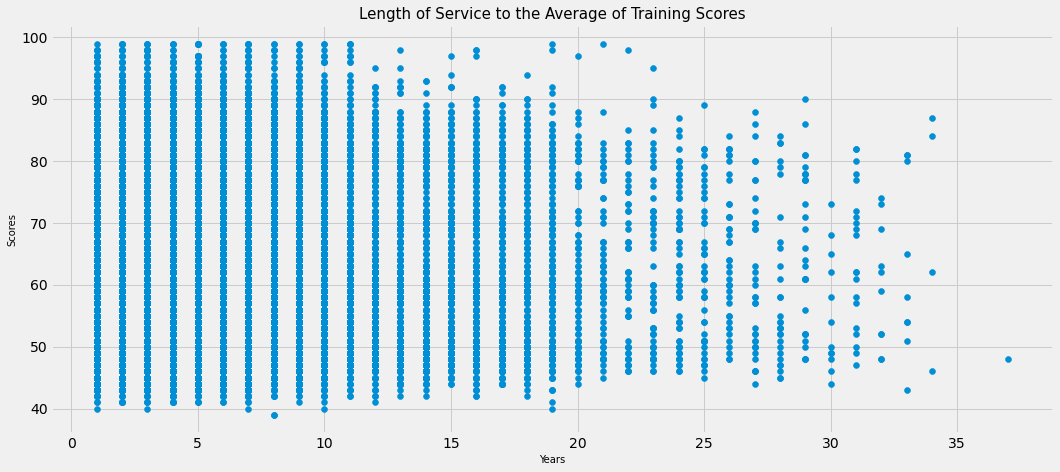

In [ ]:
#age to the avg training score

plt.rcParams['figure.figsize'] = (16, 7)
plt.scatter(train['length_of_service'], train['avg_training_score'])
plt.title('Length of Service to the Average of Training Scores', fontsize = 15)
plt.ylabel('Scores', fontsize = 10)
plt.xlabel('Years', fontsize = 10)
plt.show()

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

In [ ]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


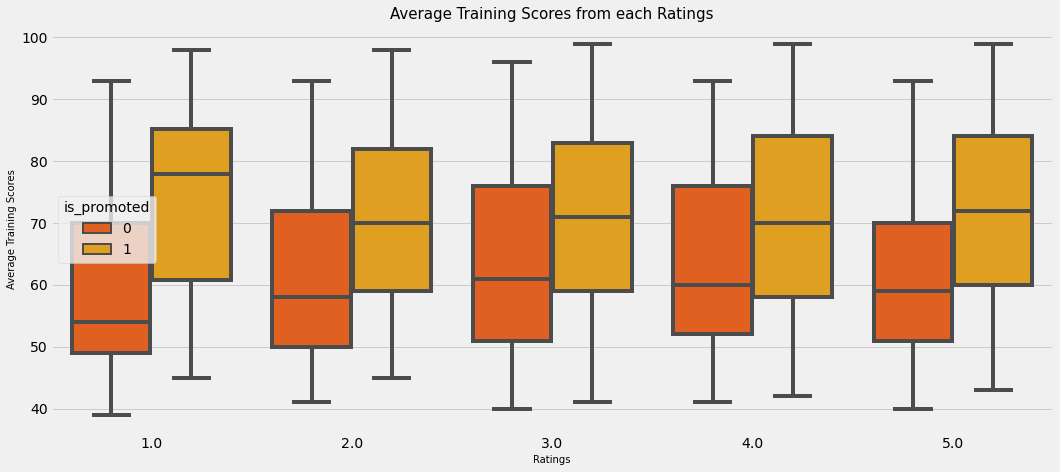

In [ ]:
#previous year rating to the average training score on promoted or not

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'previous_year_rating', y = 'avg_training_score',
            hue='is_promoted', data = train,
            palette = 'autumn')
plt.title('Average Training Scores from each Ratings', fontsize = 15)
plt.ylabel('Average Training Scores', fontsize = 10)
plt.xlabel('Ratings', fontsize = 10)
plt.show()

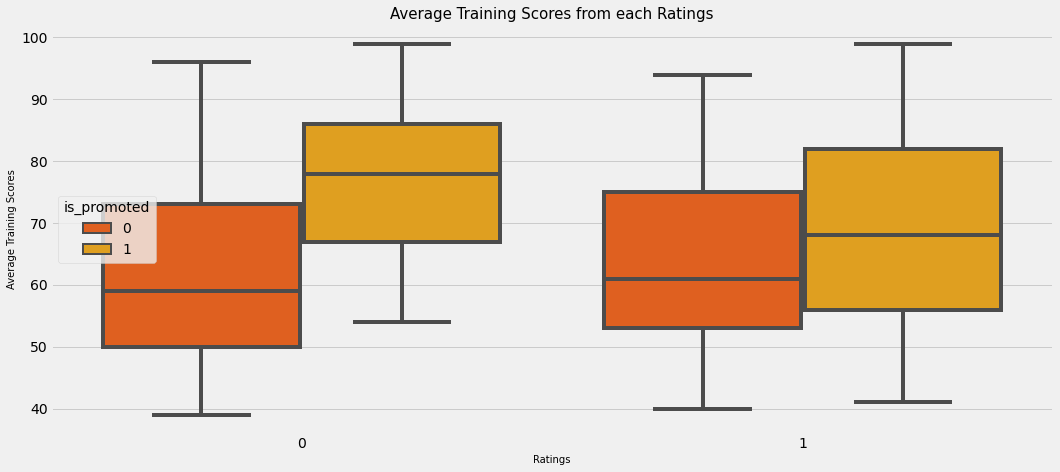

In [ ]:
#KPIs met 80% to the training score on promoted or now

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'KPIs_met >80%', y = 'avg_training_score',
            hue='is_promoted', data = train,
            palette = 'autumn')
plt.title('Average Training Scores from each Ratings', fontsize = 15)
plt.ylabel('Average Training Scores', fontsize = 10)
plt.xlabel('Ratings', fontsize = 10)
plt.show()

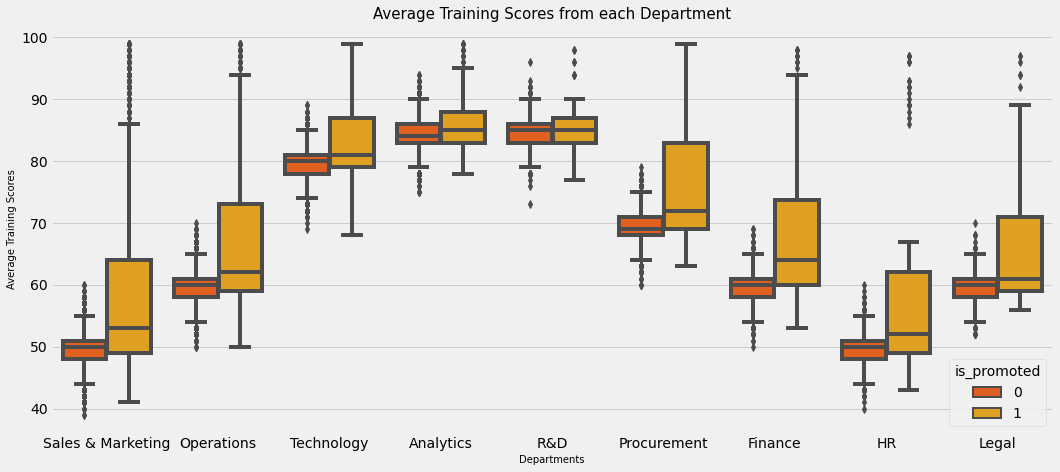

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'department', y = 'avg_training_score',
            hue = 'is_promoted', data=train, palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Average Training Scores', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

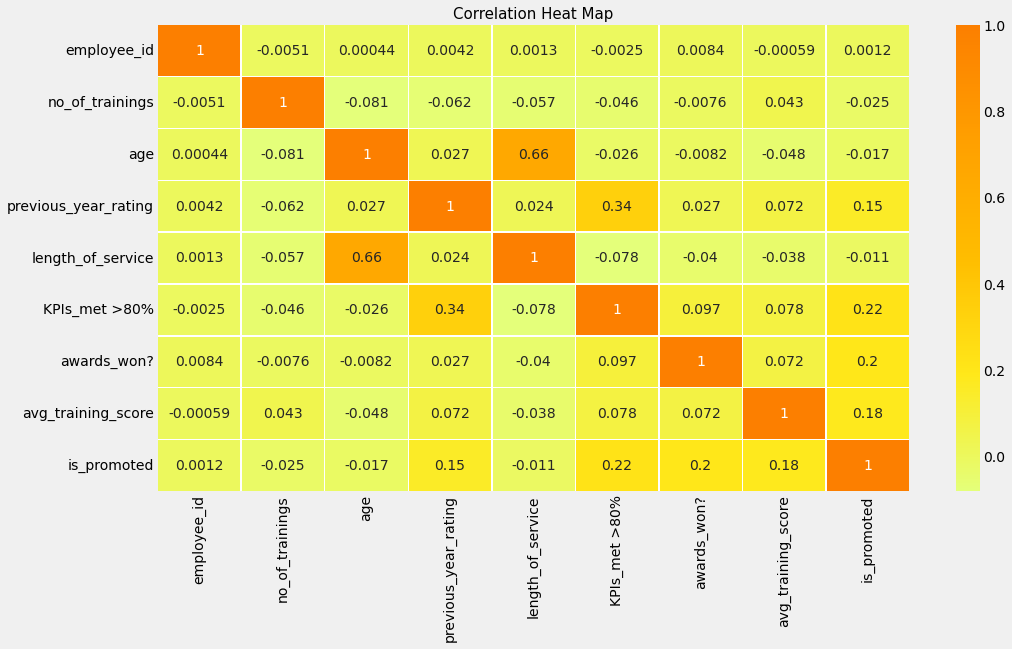

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

#Data Preprocessing for Model

## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations

In [ ]:
train2 = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
train2.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0


In [ ]:
test2 = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test2.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61


In [ ]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 60
but, still got promotion.
'''

train2[(train2['KPIs_met >80%'] == 0) & (train2['previous_year_rating'] == 1.0) &
      (train2['awards_won?'] == 0) & (train2['avg_training_score'] < 60) & (train2['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1


In [ ]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train2 = train2.drop(train[(train['KPIs_met >80%'] == 0) & (train2['previous_year_rating'] == 1.0) &
      (train2['awards_won?'] == 0) & (train2['avg_training_score'] < 60) & (train2['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train2.shape)

Before Deleting the above two rows : (54808, 14)
After Deletion of the above two rows : (54806, 11)


##Label Encoder

In [ ]:
train2['gender'] = train2['gender'].replace(('f','m'),(0,1))
test2['gender'] = test2['gender'].replace(('f','m'),(0,1))

train2['education'] = train2['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test2['education'] = test2['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

from sklearn.preprocessing import LabelEncoder

label_dept = LabelEncoder().fit(train2['department'])

train2['department'] = label_dept.transform(train2['department'])
test2['department'] = label_dept.transform(test2['department'])

In [ ]:
train2.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,3,0,1,35,5.0,8,1,0,49,0
1,4,2,1,1,30,5.0,4,0,0,60,0
2,7,2,1,1,34,3.0,7,0,0,50,0
3,7,2,1,2,39,1.0,10,0,0,50,0
4,8,2,1,1,45,3.0,2,0,0,73,0


In [ ]:
test2.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,2,1,1,24,3.0,1,1,0,77
1,2,2,0,1,31,3.0,5,0,0,51
2,7,2,1,1,31,1.0,4,0,0,47
3,5,2,0,3,31,2.0,9,0,0,65
4,1,2,1,1,30,4.0,7,0,0,61


In [ ]:
label_dept.classes_

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'], dtype=object)

In [ ]:
for i in range(len(label_dept.classes_)):
  print(i,'->',label_dept.classes_[i])

0 -> Analytics
1 -> Finance
2 -> HR
3 -> Legal
4 -> Operations
5 -> Procurement
6 -> R&D
7 -> Sales & Marketing
8 -> Technology


##Feature and Label Splitting

In [ ]:
# lets split the target data from the train data

y = train2['is_promoted'].values
x = train2.drop(['is_promoted'], axis = 1)

x_test = test2

# lets print the shapes of these newly formed data sets
print("Shape of the x      :", x.shape)
print("Shape of the y      :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x      : (54806, 10)
Shape of the y      : (54806,)
Shape of the x Test : (23490, 10)


##Resampling Data

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling.
* We will not use Under Sampling to avoid data loss.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Sebelum Resampling :',Counter(y))

x_resample, y_resample  = SMOTE().fit_resample(x, y)

print('Setelah Resampling :',Counter(y_resample))

Sebelum Resampling : Counter({0: 50140, 1: 4666})
Setelah Resampling : Counter({0: 50140, 1: 50140})


##Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample,
                                                      test_size = 0.2, random_state = 0)

# lets print the shapes again
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", Counter(y_train))
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", Counter(y_valid))
print("Shape of the x Test  :", x_test.shape)

Shape of the x Train : (80224, 10)
Shape of the y Train : Counter({0: 40159, 1: 40065})
Shape of the x Valid : (20056, 10)
Shape of the y Valid : Counter({1: 10075, 0: 9981})
Shape of the x Test  : (23490, 10)


##Feature Scaling or Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train[x_train.columns])
x_valid[x_valid.columns] = sc.transform(x_valid[x_valid.columns])
x_test[x_test.columns] = sc.transform(x_test[x_test.columns])

In [ ]:
x_train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
46838,0.823387,1.753270,-1.293711,1.685447,0.749901,1.229396,0.083956,-0.936824,-0.16218,-1.369603
72552,0.823387,-0.471675,0.772970,-0.341435,0.072481,-0.519214,-0.403402,1.067437,-0.16218,1.877699
6015,-1.953617,-0.471675,0.772970,-0.341435,-0.604939,-0.519214,-0.403402,-0.936824,-0.16218,1.324967
26288,0.823387,-0.471675,-1.293711,1.685447,1.833774,-0.519214,3.739145,-0.936824,-0.16218,-0.955054
61812,0.823387,-0.471675,0.772970,-0.341435,-0.875908,-0.519214,-1.134440,-0.936824,-0.16218,-0.885962


#Model

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #pemanggilan model
lr.fit(x_train, y_train) #training model dengan data train
lr.score(x_train, y_train) #cek akurasi training

0.7148110291184683

In [ ]:
y_lr = lr.predict(x_valid)
print(y_lr[:5])
print(y_valid[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
lr.score(x_valid, y_valid) #cek akurasi evaluasi model

0.7144994016753091

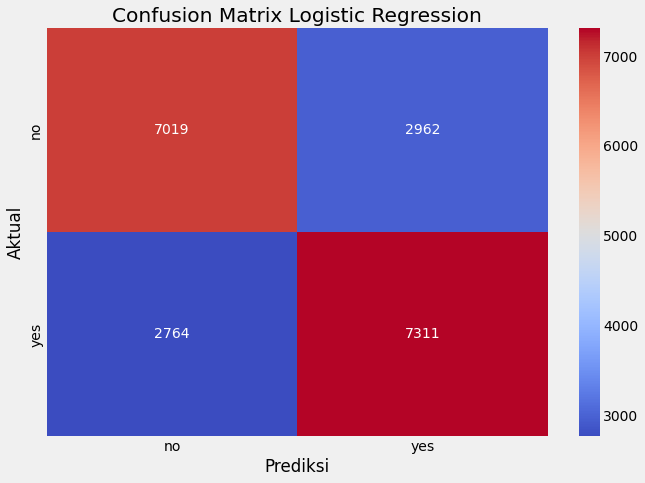

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,y_lr)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_lr))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      9981
           1       0.71      0.73      0.72     10075

    accuracy                           0.71     20056
   macro avg       0.71      0.71      0.71     20056
weighted avg       0.71      0.71      0.71     20056



##K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #memanggil model
knn.fit(x_train, y_train) #training model dengan data train
knn.score(x_train, y_train) #cek akurasi training

0.9432339449541285

In [ ]:
y_knn = knn.predict(x_valid)
print(y_knn[:5])
print(y_valid[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
knn.score(x_valid, y_valid)

0.8920023932987634

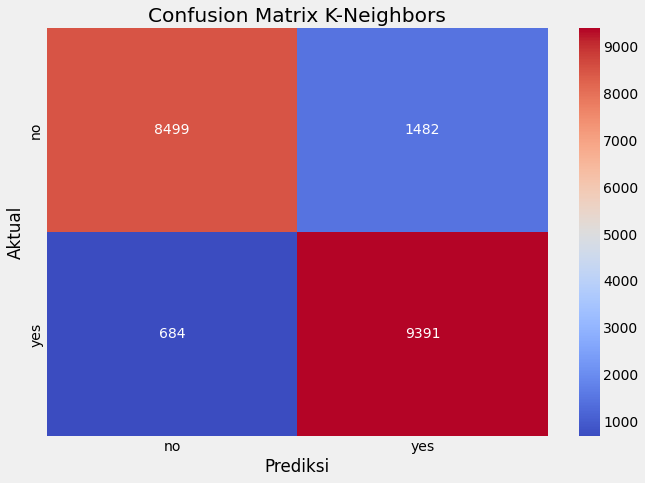

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,y_knn)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix K-Neighbors')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_knn))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      9981
           1       0.86      0.93      0.90     10075

    accuracy                           0.89     20056
   macro avg       0.89      0.89      0.89     20056
weighted avg       0.89      0.89      0.89     20056



##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() #memanggil model
nb.fit(x_train, y_train) #train dengan data train
nb.score(x_train, y_train) #cek akurasi training

0.7166184682887914

In [ ]:
y_nb = nb.predict(x_valid)
print(y_nb[:5])
print(y_valid[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
nb.score(x_valid, y_valid)

0.7183386517750299

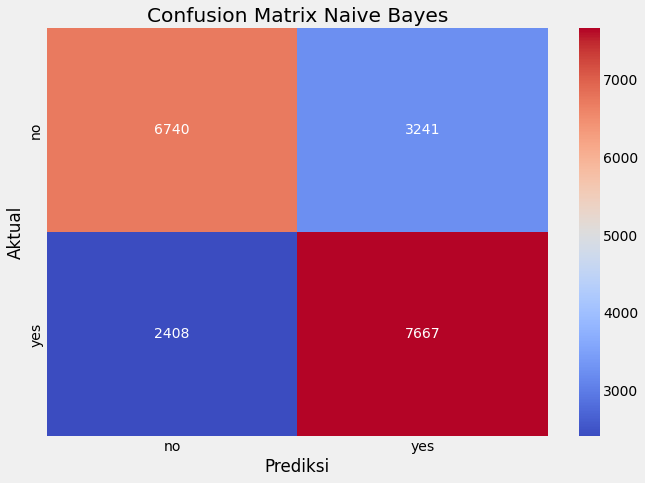

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,y_nb)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_nb))

              precision    recall  f1-score   support

           0       0.74      0.68      0.70      9981
           1       0.70      0.76      0.73     10075

    accuracy                           0.72     20056
   macro avg       0.72      0.72      0.72     20056
weighted avg       0.72      0.72      0.72     20056



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50) #memanggil model
dt.fit(x_train, y_train) #train model dengan data train
dt.score(x_train, y_train) #cek akurasi training

0.9885445751894695

In [ ]:
#contoh model decision tree simpel untuk visualisasi model decision tree
dt1 = DecisionTreeClassifier(max_depth=4)
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

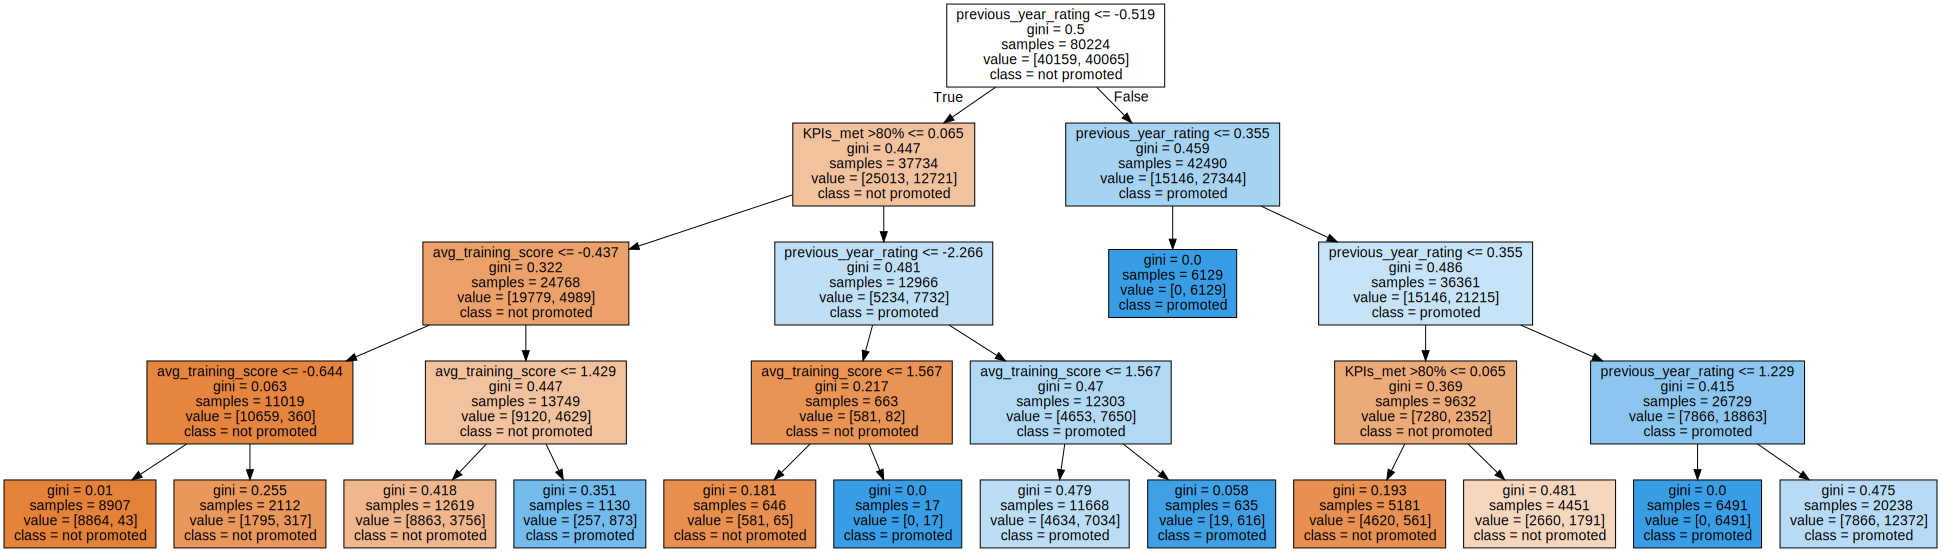

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt1, out_file=None,
                                feature_names=x_train.columns,
                                class_names=['not promoted','promoted'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
graph.render("Decision Tree Employee Promotion")

'Decision Tree Employee Promotion.png'

In [ ]:
y_dt = dt.predict(x_valid)
print(y_dt[:5])
print(y_valid[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
dt.score(x_valid, y_valid)

0.9284004786597527

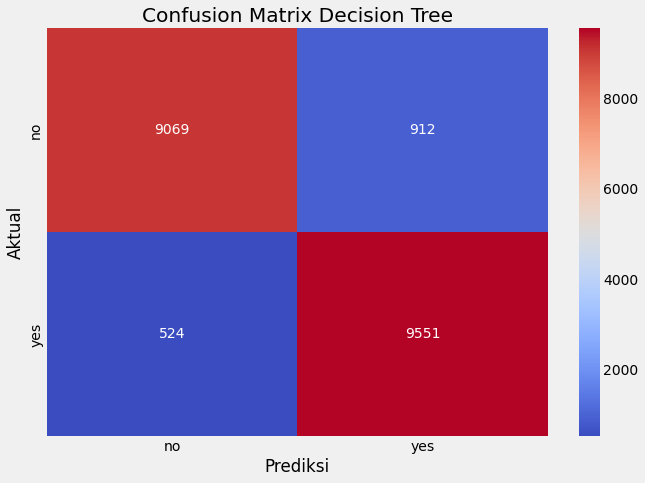

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,y_dt)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_dt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9981
           1       0.91      0.95      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #memanggil model
rf.fit(x_train, y_train) #training model
rf.score(x_train, y_train) #cek akurasi training model

0.9885445751894695

In [ ]:
y_rf = rf.predict(x_valid)
print(y_rf[:5])
print(y_valid[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
rf.score(x_valid, y_valid)

0.9439070602313522

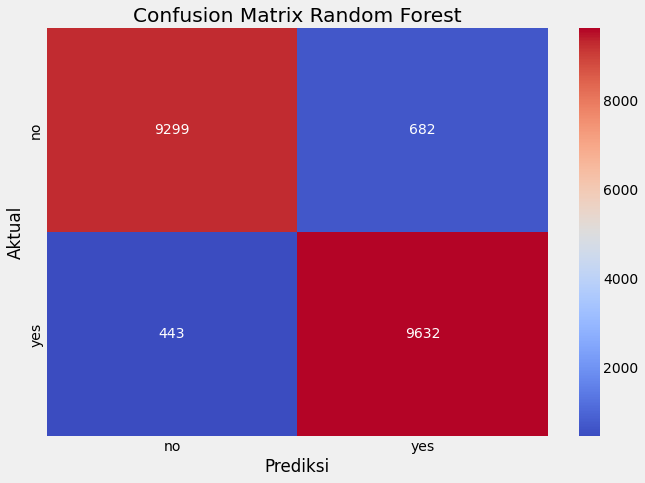

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,y_rf)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,y_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9981
           1       0.93      0.96      0.94     10075

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



#Model Comparison

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('----------Accuracy----------')
print('Logistic Regression : {:.2f}%'.format(accuracy_score(y_valid, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(accuracy_score(y_valid, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(accuracy_score(y_valid, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(accuracy_score(y_valid, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(accuracy_score(y_valid, y_rf)*100))
#print('Deep Neural Network : {:.2f}%'.format(accuracy_score(y_valid, yfinal_dnn)*100))

print('============================')
print('============================')

print('---------Precision----------')
print('Logistic Regression : {:.2f}%'.format(precision_score(y_valid, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(precision_score(y_valid, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(precision_score(y_valid, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(precision_score(y_valid, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(precision_score(y_valid, y_rf)*100))
#print('Deep Neural Network : {:.2f}%'.format(precision_score(y_valid, yfinal_dnn)*100))

print('============================')
print('============================')

print('-----------Recall-----------')
print('Logistic Regression : {:.2f}%'.format(recall_score(y_valid, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(recall_score(y_valid, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(recall_score(y_valid, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(recall_score(y_valid, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(recall_score(y_valid, y_rf)*100))
#print('Deep Neural Network : {:.2f}%'.format(recall_score(y_valid, yfinal_dnn)*100))

----------Accuracy----------
Logistic Regression : 71.45%
K-Neighbors         : 89.20%
Naive Bayes         : 71.83%
Decision Tree       : 92.84%
Random Forest       : 94.39%
---------Precision----------
Logistic Regression : 71.17%
K-Neighbors         : 86.37%
Naive Bayes         : 70.29%
Decision Tree       : 91.28%
Random Forest       : 93.39%
-----------Recall-----------
Logistic Regression : 72.57%
K-Neighbors         : 93.21%
Naive Bayes         : 76.10%
Decision Tree       : 94.80%
Random Forest       : 95.60%


Dari model yang telah dibuat, model Random Forest masih menggungguli model yang lainnya dalam Accuracy, Precision dan Recall, jadi Random Forest dapat disimpulkan sebagai model terbaik untuk melakukan klasifikasi pada dataset ini

In [ ]:
rf.feature_importances_

array([0.09418684, 0.01369298, 0.01847572, 0.02623327, 0.13483605,
       0.23839927, 0.08892915, 0.09618735, 0.00675028, 0.28230907])

In [ ]:
x_train.columns.values

array(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'], dtype=object)

<BarContainer object of 10 artists>

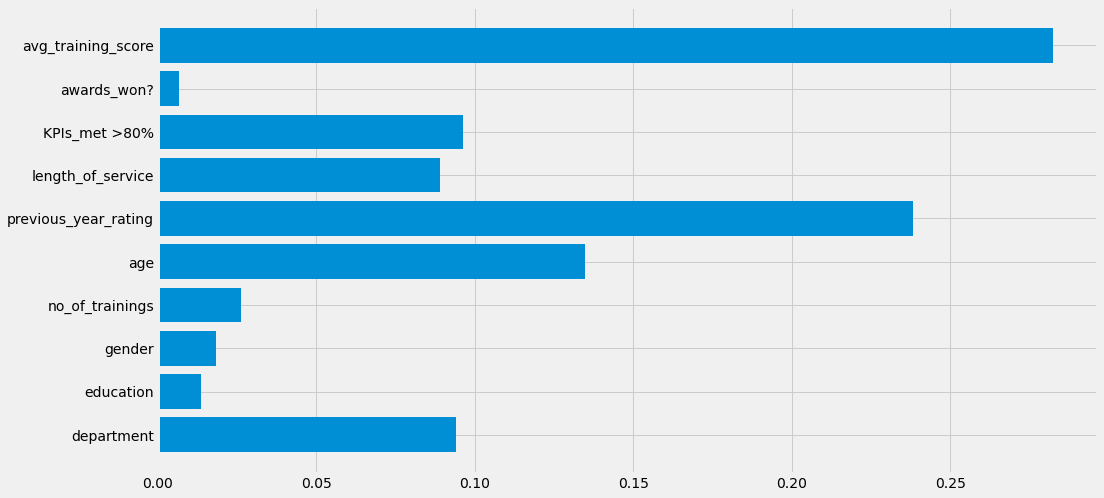

In [ ]:
plt.barh(x_train.columns.values, rf.feature_importances_)

Text(0.5, 1.0, 'Random Forest Feature Importance')

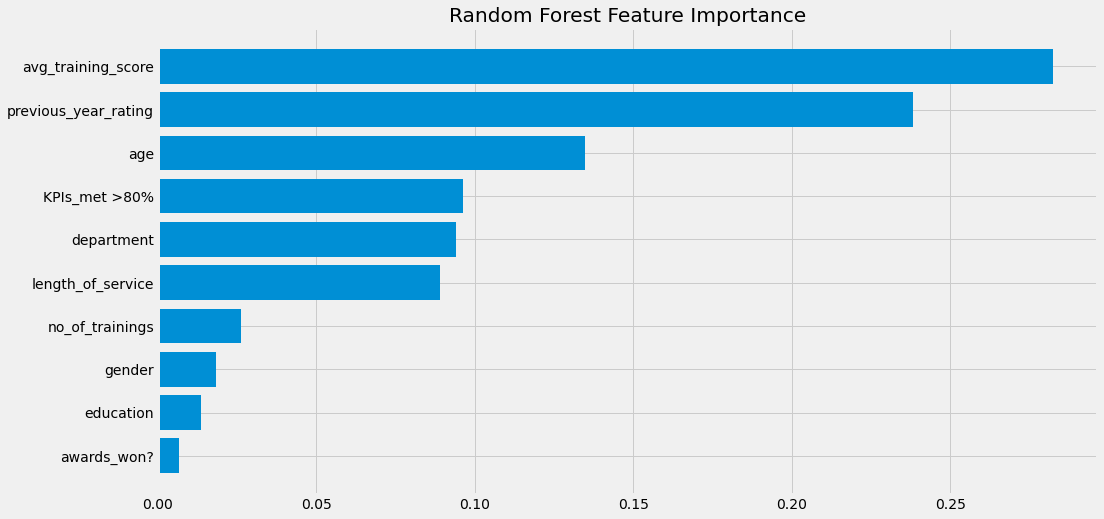

In [ ]:
sorted = rf.feature_importances_.argsort()
plt.barh(x_train.columns.values[sorted], rf.feature_importances_[sorted])
plt.title('Random Forest Feature Importance')

#Testing Data Prediction

In [ ]:
import joblib

#Export Model RandomForest
joblib.dump(rf, 'Model Random Forest Promosi Karyawan.sav')

['Model Random Forest Promosi Karyawan.sav']

In [ ]:
#Baca Model

model = joblib.load('Model Random Forest Promosi Karyawan.sav')

In [ ]:
y_test = model.predict(x_test)
y_test[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test['is_promoted'] = y_test
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,0


In [ ]:
test['is_promoted'].value_counts()

0    21044
1     2446
Name: is_promoted, dtype: int64

In [ ]:
#Export Hasil Prediksi Data Test

test.to_csv('Hasil Prediksi Promosi Karyawan Data Testing.csv',index=False)

#Real Time Prediction

In [ ]:
x_train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
#Meminta Data pada User
data = []
for col in x_train.columns:
  if(col not in ['department','education','gender']):
    x = float(input('Masukkan data {} : '.format(col)))
    data.append(x)
  else:
    x = input('Masukkan data {} : '.format(col))
    data.append(x)

df1 = pd.DataFrame(columns=x_train.columns)
df1.loc[0] = data

df = df1.copy()

#Melakukan LabelEncoder pada Data
df['gender'] = df['gender'].replace(('female','male'),(0,1))
df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), (3, 2, 1))
df['department'] = label_dept.transform(df['department'])

#Melakukan Scaling/Normalization
df[df.columns] = sc.transform(df[df.columns])

hasil = model.predict(df)

Masukkan data department : Technology
Masukkan data education : Bachelor's
Masukkan data gender : female
Masukkan data no_of_trainings : 1
Masukkan data age : 30
Masukkan data previous_year_rating : 4
Masukkan data length_of_service : 2
Masukkan data KPIs_met >80% : 1
Masukkan data awards_won? : 0
Masukkan data avg_training_score : 90


In [ ]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


In [ ]:
df1

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,female,1.0,30.0,4.0,2.0,1.0,0.0,90.0


In [ ]:
if (hasil==0):
  print('Karyawan tidak dipromosikan')
else:
  print('Karyawan dipromosikan')

Karyawan dipromosikan
